[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
[[1723 1562 1563 ... 1600 1601 1602]
 [1722 1561 1408 ... 1445 1446 1603]
 [1721 1560 1407 ... 1298 1447 1604]
 ...
 [1685 1524 1371 ... 1334 1483 1640]
 [1684 1523 1522 ... 1485 1484 1641]
 [1683 1682 1681 ... 1644 1643 1642]]


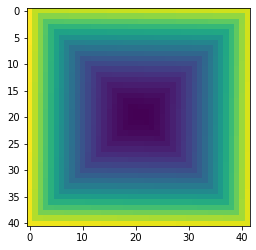

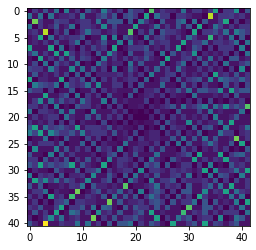

Text(0.5, 0.92, 'Not Shaded')

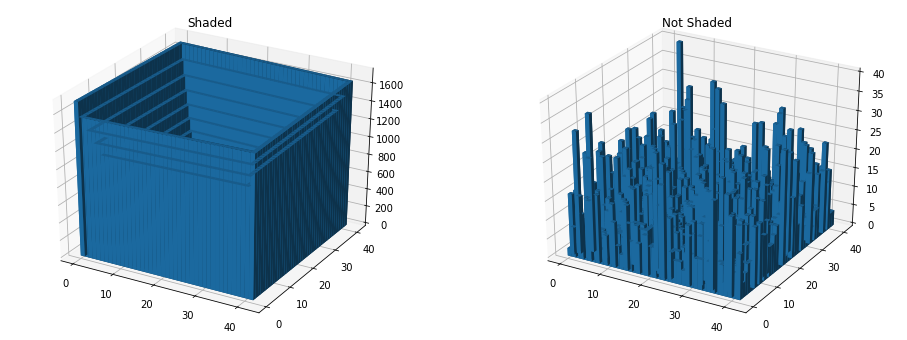

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from functools import reduce
def factor_num(n):    
    return set(reduce(list.__add__, 
                ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

# fake data
size=20
_x = np.arange(size*2+2)
_y = np.arange(size*2+1)
_xx, _yy = np.meshgrid(_x, _y)
# print(_xx);
# print(_yy);
x, y = _xx.ravel(), _yy.ravel()


top = x + y
factors=x+y;
values= -np.ones((size*2+2,size*2+1));
values[size+1][size]=1
print(values)

def getSpiralDir(x,y,n):
    b=x-y<=1;
    a=x+y<n-1;
    if(a and b):
        return 0
    b=x-y<1;
    if(not a and b):
        return 1
    b=x-y<1;
    a=x+y<=n;
    if(not a and not b):
        return 2
    return 3

def getSpiralNum(x,y,n):
#     print("X,Y:("+str(x)+":"+str(y)+")")
    visited=[]
    while(values[x][y]<0):
        visited.append([x,y])
        direct=getSpiralDir(x,y,n);
        val=-1;
#         step direct
        if(direct==0):
            y+=1
        elif(direct==1):
            x+=1
        elif(direct==2):
            y+=-1
        elif(direct==3):
            x+=-1
    hitval=values[x][y]
    for visits in reversed(visited):
        hitval+=1
        values[visits[0],visits[1]]=hitval
    return hitval+1;


for i in reversed(range(len(top))):
    num=getSpiralNum(x[i],y[i],size*2+1);
    top[i]=num
    factors[i]=len(factor_num(num))
    
testTop= np.resize(top,(size*2+1,size*2+2));
factorsHeight= np.resize(factors,(size*2+1,size*2+2));
print(testTop)

fig, ax = plt.subplots()
im = ax.imshow(testTop)
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(factorsHeight)
plt.show()

            
# setup the figure and axes
fig = plt.figure(figsize=(8*2,3*2))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, factors, shade=True)
ax2.set_title('Not Shaded')

In [34]:
factors(24)

TypeError: 'numpy.ndarray' object is not callable